<a href="https://colab.research.google.com/github/shoyon-at-git/EDGE_2202003/blob/main/rainfall_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd

df = pd.read_csv('/content/Temp_and_rain.csv')
df.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1380 non-null   float64
 1   Month   1380 non-null   int64  
 2   Year    1380 non-null   int64  
 3   rain    1380 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 43.3 KB


In [72]:
df.describe()

,tem,Month,Year,rain
count,1380.000000,1380.000000,1380.00000,1380.000000
mean,25.066213,6.500000,1958.00000,203.275431
std,3.682411,3.453304,33.20842,202.730898
min,16.800600,1.000000,1901.00000,0.000000
25%,22.114125,3.750000,1929.00000,18.498850
50%,27.012950,6.500000,1958.00000,145.086000
75%,28.007850,9.250000,1987.00000,347.639500
max,29.526000,12.000000,2015.00000,1012.020000


In [73]:
print(df.isnull().sum())

tem      0
Month    0
Year     0
rain     0
dtype: int64


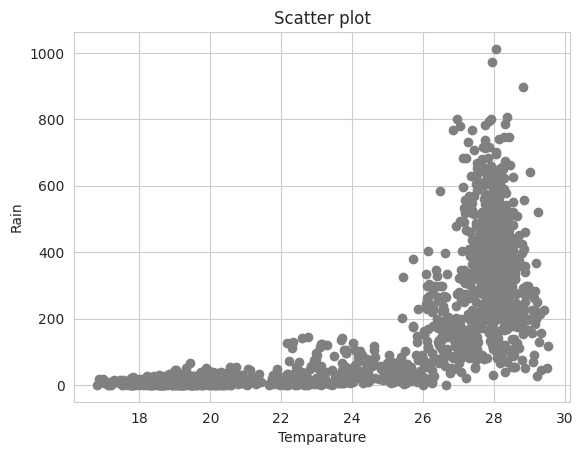

In [74]:
#scatter plot temp vs rain
import matplotlib.pyplot as plt
plt.scatter(df.tem, df.rain, color="gray")
plt.title("Scatter plot")
plt.xlabel("Temparature")
plt.ylabel("Rain")
plt.show();


Text(0.5, 1.0, 'Month vs Rainfall')

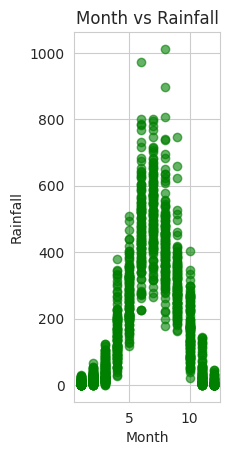

In [75]:
# Month vs Rain
plt.subplot(1,3,2)
plt.scatter(df['Month'], df['rain'], alpha=0.6, color="green")
plt.xlabel("Month")
plt.ylabel("Rainfall")
plt.title("Month vs Rainfall")

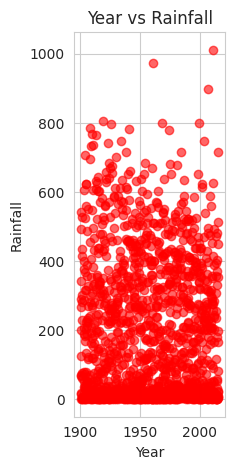

In [76]:
# Year vs Rain
plt.subplot(1,3,3)
plt.scatter(df['Year'], df['rain'], alpha=0.6, color="red")
plt.xlabel("Year")
plt.ylabel("Rainfall")
plt.title("Year vs Rainfall")
plt.tight_layout()
plt.show()

In [77]:
X = df[['tem', 'Month']]
y = df['rain']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

print("Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R²:", r2_score(y_test, y_pred_lin))


Linear Regression Performance:
MSE: 22760.38765501178
R²: 0.46732831170412337


In [80]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(X_test)
error = mse(y_test, predicted) ** .5
print(error)


150.86546210121048


In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "R²": r2}
    print(f"{name} → MSE: {mse:.4f}, R²: {r2:.4f}")


Decision Tree → MSE: 11997.9951, R²: 0.7192
Random Forest → MSE: 9207.0931, R²: 0.7845
Gradient Boosting → MSE: 7934.6702, R²: 0.8143
XGBoost → MSE: 9711.5226, R²: 0.7727
Support Vector Regressor → MSE: 30889.0463, R²: 0.2771
KNN Regressor → MSE: 6906.7638, R²: 0.8384


/tmp/ipython-input-2757865681.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R²"], palette=palette)


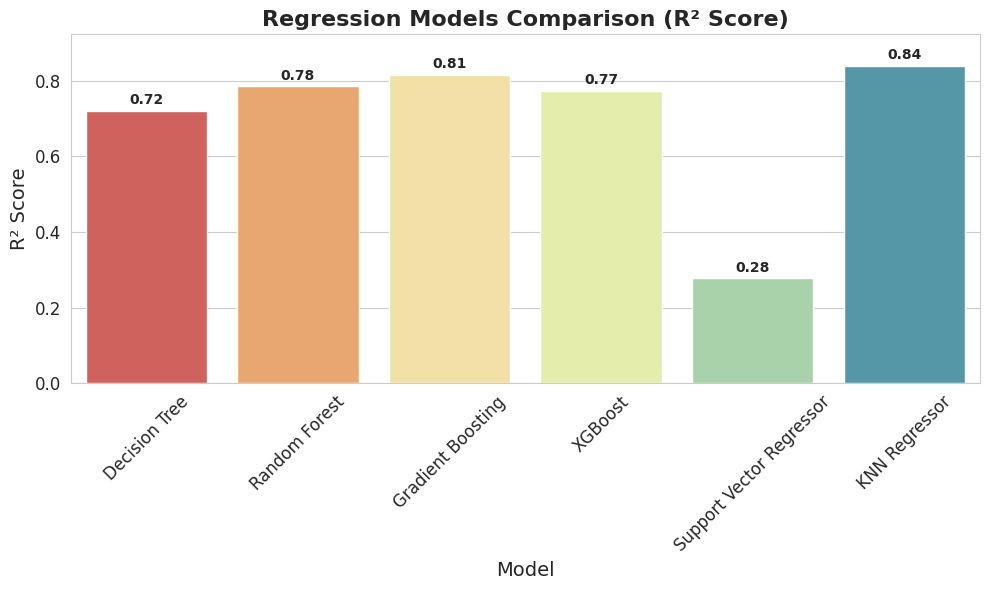

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

palette = sns.color_palette("Spectral", len(results_df))

sns.barplot(x=results_df.index, y=results_df["R²"], palette=palette)

for i, r2 in enumerate(results_df["R²"]):
    plt.text(i, r2 + 0.01, f"{r2:.2f}", ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Regression Models Comparison (R² Score)", fontsize=16, fontweight='bold')
plt.ylabel("R² Score", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.ylim(0, 1.1*results_df["R²"].max())
plt.tight_layout()
plt.show()


In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = [
    RandomForestRegressor(n_estimators=100, random_state=42),
    DecisionTreeRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    SVR(),
    KNeighborsRegressor(n_neighbors=5)
]

errors = {}

for model in models:
    model.fit(X_train, y_train)
    name = type(model).__name__
    r2_score_percent = model.score(X_test, y_test) * 100  # R² as percentage
    errors[name] = r2_score_percent

print("R² Scores of all models (%):")
for name, score in errors.items():
    print(f"{name}: {score:.2f}%")


R² Scores of all models (%):
RandomForestRegressor: 78.45%
DecisionTreeRegressor: 71.92%
GradientBoostingRegressor: 81.43%
XGBRegressor: 77.27%
SVR: 27.71%
KNeighborsRegressor: 83.84%


In [84]:
errors

{'RandomForestRegressor': 78.45222198114297,
 'DecisionTreeRegressor': 71.92054723507427,
 'GradientBoostingRegressor': 81.43013093312403,
 'XGBRegressor': 77.27168262449953,
 'SVR': 27.708962248817226,
 'KNeighborsRegressor': 83.83578699265645}

<BarContainer object of 6 artists>

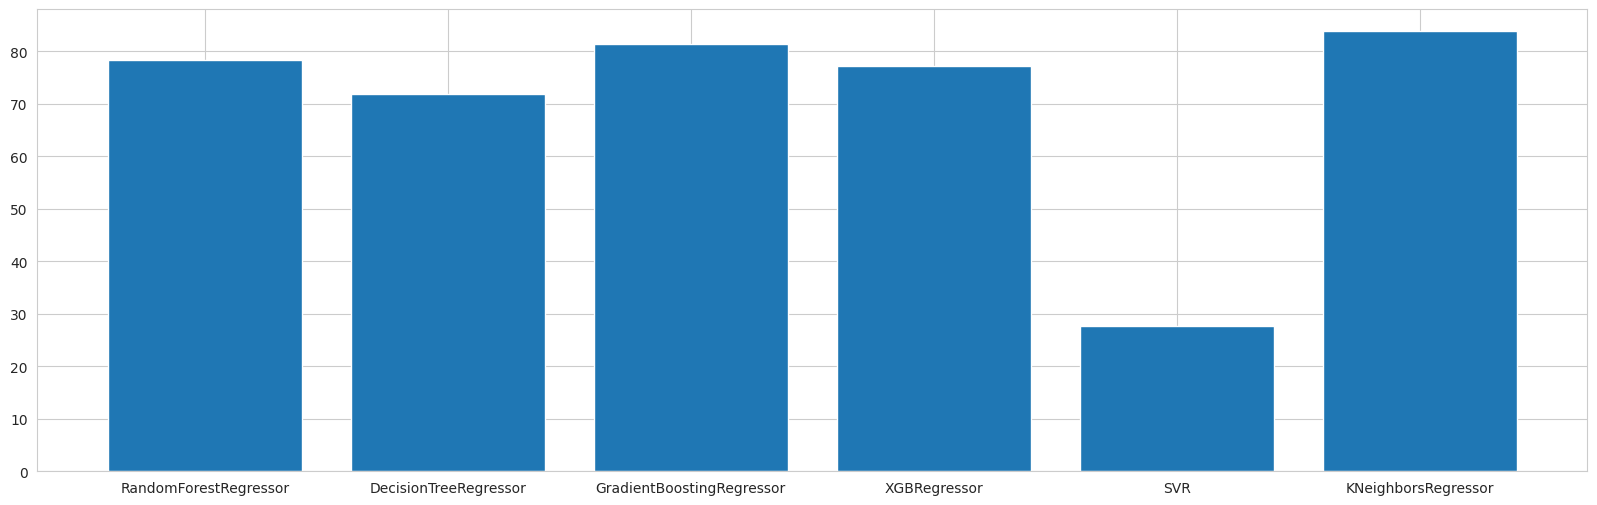

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.bar(errors.keys(),errors.values())


/tmp/ipython-input-1929649822.py:31: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


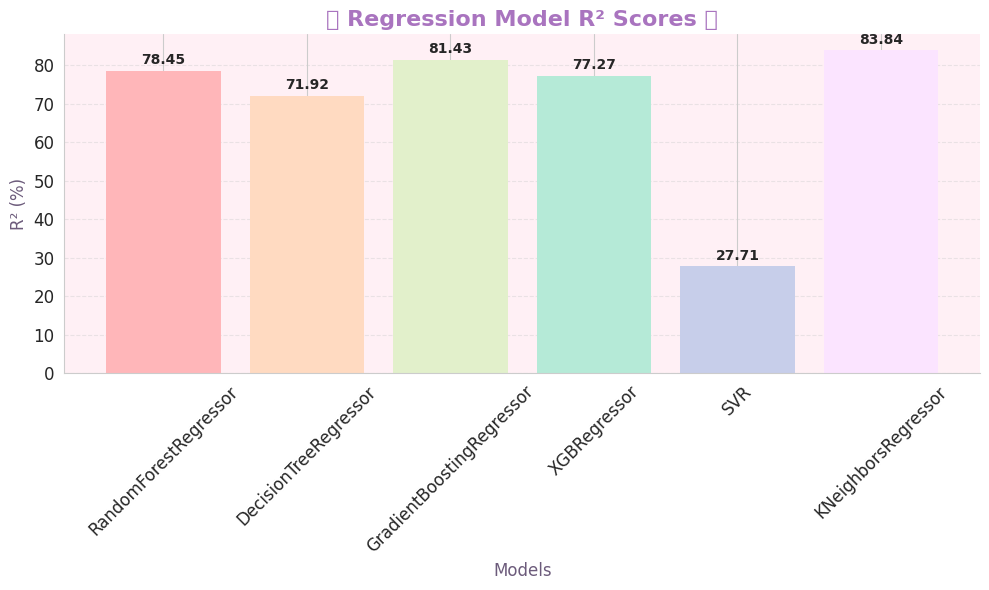

In [86]:
import matplotlib.pyplot as plt

# Define a pastel color palette (repeat if there are more models than colors)
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA', '#FBE4FF']

plt.figure(figsize=(10, 6))

# Create the bar chart
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)], edgecolor='none')

# Add R² values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# Labels and title with cute fonts
plt.title('🐾 Regression Model R² Scores 🐾', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('R² (%)', fontsize=12, color='#6C5B7B')

# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right borders for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
